<a href="https://colab.research.google.com/github/glima91/mestrado-redes-neurais/blob/main/Atividade_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparar a redução do custo entre o Perceptron com treinamento online e com o treinamento em batch

Faça um Jupyter Notebook com gráficos comparando a redução do custo em duas implementações diferentes do perceptron:

1 - com o treinamento online, isto é, o ajustes dos pesos usa o erro de 1 exemplo e cada vez;

2 - com o treinamento em batch, quando usa-se todos os exemplos da base de dados simultaneamente para estimar o erro e ajustar os pesos.
Escreva um parágrafo explicando as diferenças e o motivo do comportamento de cada implementação.

A entrega é um link para o Jupyter Notebook  hospedado no GitHub.

In [165]:
# Importação de bibliotecas
from sklearn.base import BaseEstimator, ClassifierMixin
import random
import numpy as np
import matplotlib.pyplot as plt

In [166]:
# Cria datasets X e y
def criaDataset(n=20):
  X = np.random.uniform(size=(n, 2))
  y = np.array(X[:,0] > X[:,1], dtype=int) * 2 - 1
  return X, y

In [167]:
X_train, y_train = criaDataset(1000)
X_test, y_test = criaDataset(2000)

In [168]:
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}")

X_train shape: (1000, 2)
y_train shape: (1000,)


## Perceptron com treinamento online

In [169]:
class PerceptronOnline(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.w = None
    # Se a < 0 retorna -1 e se a > 0 retorna 1
    self.activation = lambda a: (a>0) * 2 - 1
    # Núm. máximo de iterações
    self.max_iter = max_iter
    # Custo em cada iteração
    self.cost = []

  def fit(self, X, y):
    self.w = np.random.uniform(-1,1, size=X.shape[1])
    indexes = list(range(X.shape[0]))

    self.cost = []

    # Realiza n Iterações
    for _ in range(self.max_iter):
      any_error = False
      cost = 0
      # Para cada elemento do dataset aplica o modelo, calcula o erro e ajusta o peso w
      for i in sorted(indexes, key=lambda k: random.random()):
        x = X[i, :]
        ypred = self.predict(x)
        error = y[i] - ypred
        # Cálculo do custo
        cost += error ** 2
        
        if error != 0:
          any_error = True
        self.w = self.w + error * x

      self.cost.append(cost)
      if not any_error:
        break

  def predict(self, X, y=None):
    a =  X @ self.w
    ypred = self.activation(a)
    return ypred   

In [170]:
perceptron_online = PerceptronOnline()
perceptron_online.fit(X_train, y_train)
ypred = perceptron_online.predict(X_train)

In [171]:
cost_online = perceptron_online.cost
x_l = list(range(1, len(cost_online)+1))

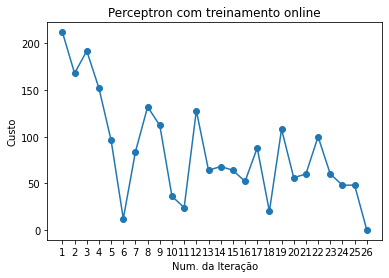

In [172]:
plt.plot(x_l, cost_online,"-o")
plt.xticks(x_l)
plt.title("Perceptron com treinamento online")
plt.xlabel('Num. da Iteração')
plt.ylabel('Custo')
plt.show()

In [173]:
# Avaliacao da acurácia com os dados de teste
ypred = perceptron_online.predict(X_test)
sum(y_test == ypred)/len(y_test)

1.0

## Perceptron com batch

In [174]:
class PerceptronBatch(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.w = None
    # Se a < 0 retorna -1 e se a > 0 retorna 1
    self.activation = lambda a: (a>0) * 2 - 1
    # Núm. máximo de iterações
    self.max_iter = max_iter
    # Erro em cada iteração
    self.cost = []

  def fit(self, X, y):
    self.w = np.random.uniform(-1,1, size=X.shape[1])
    indexes = list(range(X.shape[0]))

    self.cost = []

    # Realiza n Iterações
    for _ in range(self.max_iter):
      # Para todo o dataset aplica o modelo, calcula o erro e ajusta o peso w
      ypred = self.predict(X)
      errors = y - ypred
      # Cálculo do custo
      cost = sum(errors ** 2)

      self.cost.append(cost)

      if cost == 0:
        break
      self.w += X.T @ errors
      
    

  def predict(self, X, y=None):
    a =  X @ self.w
    ypred = self.activation(a)
    return ypred   

In [175]:
perceptron_batch = PerceptronBatch()
perceptron_batch.fit(X_train, y_train)
ypred = perceptron_batch.predict(X_train)

In [176]:
cost_batch = perceptron_batch.cost
x_l = list(range(1, len(cost_batch)+1))

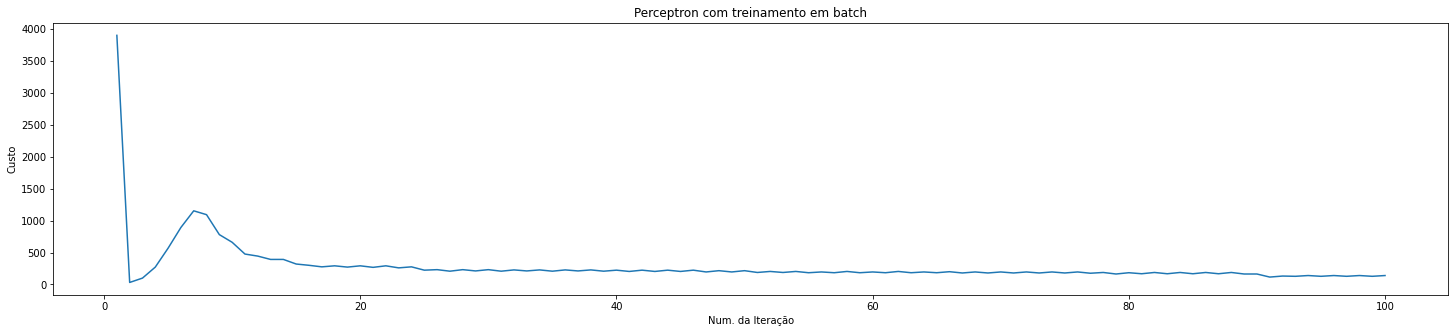

In [177]:
plt.figure(figsize=(25,5))
plt.plot(x_l, cost_batch,"-")
#plt.xticks(x_l)
plt.title("Perceptron com treinamento em batch")
plt.xlabel('Num. da Iteração')
plt.ylabel('Custo')
plt.show()

In [178]:
# Avaliacao da acurácia com os dados de teste
ypred = perceptron_online.predict(X_test)
sum(y_test == ypred)/len(y_test)

1.0

O treinamento online permite que os valores dos pesos "W" sejam atualizados para cada uma das observações, ou seja, sempre que uma observação é analisada é gerado um erro, que é utilizado para atualizar os pesos. Dependendo da distribuição dos dados, este ajuste frequente no peso pode causar oscilações no valor da função de custo caso um conjunto de dados possua outliers, por exemplo.

Já o treinamento em batch, permite "suavizar" os valores da função de custo pois os valores de erro de várias observações são utilizados no cálculo. Realizar o ajuste de pesos a partir de todo o conjunto de dados pode se tornar um problema quando são utilizadas grandes bases de dados. Uma solução adotada é o uso de mini-batchs, ou seja, subconjuntos de dados de um dataset.